In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NLP_Project/all_tickets.csv")

In [ ]:
df[df['category']==8]

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
470,urgent remote connection,date pm urgent remote hi please assist urgentl...,1,8,33,107,59,3,4
758,sn access problem,tuesday pm sn problem hi sd getting attached e...,1,8,30,108,56,3,4
1020,poll change,thursday pm poll change dear please log assign...,1,8,30,0,59,3,4
2990,restart tape library,please restart cycle tape library device after...,1,8,30,95,11,3,4
3235,interface not accessible,tuesday november pm interface accessible hi gu...,1,8,33,0,59,3,4
...,...,...,...,...,...,...,...,...,...
47832,target alarm alarm alarm changed status from y...,original message sent monday october alarm ala...,0,8,30,0,59,2,3
47888,server poll authentication service status down,server poll authentication status down poll ou...,0,8,30,0,0,2,2
48009,target par alarm alarm alarm changed status fr...,sent friday alarm alarm alarm changed status y...,0,8,30,0,59,2,3
48215,controller a down,sent thursday controller down hi please can yo...,0,8,30,0,59,1,3


In [ ]:
df['business_service'].value_counts()

32    8174
36    3685
68    3589
67    2858
4     2527
      ... 
69       1
81       1
37       1
17       1
0        1
Name: business_service, Length: 103, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


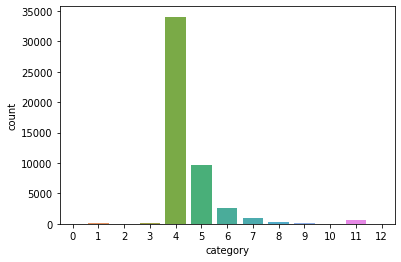

In [ ]:
sns.countplot(df['category'])

In [ ]:
df['category'].value_counts()

4     34061
5      9634
6      2628
7       921
11      612
8       239
9       191
3       137
1        72
12       45
0         4
2         3
10        2
Name: category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


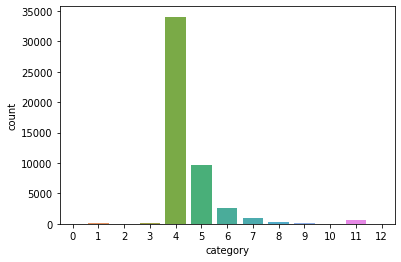

In [ ]:
ax = sns.countplot(df['category'], data=df)

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install numpy requests nlpaug
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4
...,...,...,...,...,...,...,...,...,...
48544,git space for a project issues with adding users,sent tuesday july re git space for hi got righ...,0,4,21,1,39,1,3
48545,error,sent july error hi guys can you help out with ...,0,4,9,41,10,2,3
48546,connection issues,sent tuesday july connection issues hello have...,0,5,32,0,32,2,3
48547,error cube reports,sent tuesday july error hello guys have receiv...,0,4,21,41,35,1,3


In [ ]:
# replace categories with minimum number of text data with 0
df['category'].replace([7,11,8,9,3,1,12,0,2,10],0,inplace=True)

In [ ]:
def clean_message(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        messages_cleaned: a list of words containing the processed message. 

    '''
    #Remove Punctuation
    messages_cleaned = re.sub(r'[^\w\s]', '', message)
    
    #Remove Links
    messages_cleaned = re.sub(r'https?://\S+', '', messages_cleaned)
    
    #Lower Case
    messages_cleaned = messages_cleaned.lower()
    
    #Tokenize
    messages_cleaned = word_tokenize(messages_cleaned)
    
    #Remove Stopwords
    stop_words_list = stopwords.words('english')
    for token in messages_cleaned:
        if token in stop_words_list:
            messages_cleaned.remove(token)
    
    #Perform Stemming
#     temp = messages_cleaned.copy()
#     messages_cleaned.clear()
#     for token in temp:
#         messages_cleaned.append(PorterStemmer().stem(token))
    
    return messages_cleaned

In [ ]:
df['clean_body'] = df['body'].apply(lambda row: clean_message(row))

In [ ]:
aug = naw.SynonymAug()

def augmented_data(df,category,n):
    augmented_data=[]    
    for index, row in df.iterrows():
        if(row['category'] == category):
                str1 = ' '.join(row['clean_body'])
                d= aug.augment(str1, n)
                for j in d:
                    augmented_data.append(clean_message(j))
    
    return augmented_data
            
            
m=augmented_data(df,5,2)
n=augmented_data(df,0,10)
o=augmented_data(df,6,10)

In [ ]:
len(m),len(n),len(o)

(19268, 22250, 26280)

In [ ]:
new=df.iloc[:,1:]

category_5=[]

for i in range(0,len(m)):
    category_5.append(5)


df_5 = pd.DataFrame(list(zip(category_5, m)),
               columns =['category' ,'clean_body'])
 
category_6=[]
for i in range(0,len(o)):
    category_6.append(6)

df_6 = pd.DataFrame(list(zip(category_6, o)),
               columns =['category', 'clean_body'])

category_0=[]
for i in range(0,len(n)):
    category_0.append(0)

df_0 = pd.DataFrame(list(zip(category_0, n)),
               columns =['category', 'body', 'clean_body'])


ValueError: ignored

In [ ]:
frames = [new,df_5,df_6,df_0]
result = pd.concat(frames)

In [ ]:
df_0

,category,clean_body
0,0,"[badge, removed, dear, please, badge, since, w..."
1,0,"[badge, take, dear, please, badge, since, work..."
2,0,"[badge, removed, dear, please, badge, since, o..."
3,0,"[badge, removed, pricey, please, badge, since,..."
4,0,"[badge, removed, dear, please, badge, since, w..."
...,...,...
22245,0,"[sent, wed, july, sensitive, information, acce..."
22246,0,"[sent, wednesday, july, sensitive, information..."
22247,0,"[sent, midweek, july, sensitive, information, ..."
22248,0,"[sent, wednesday, july, sensitive, information..."


In [ ]:
result

,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact,clean_body
0,hi since recruiter lead permission approve req...,1.0,4,2.0,21.0,71.0,3.0,4.0,"[hi, since, recruiter, lead, permission, appro..."
1,icon dear please setup icon per icon engineers...,1.0,6,22.0,7.0,26.0,3.0,4.0,"[icon, dear, please, setup, icon, per, icon, e..."
2,work experience user hi work experience studen...,1.0,5,13.0,7.0,32.0,3.0,4.0,"[work, experience, user, hi, work, experience,..."
3,requesting meeting hi please help follow equip...,1.0,5,13.0,7.0,32.0,3.0,4.0,"[requesting, meeting, hi, please, help, follow..."
4,re expire days hi ask help update passwords co...,1.0,4,2.0,76.0,4.0,3.0,4.0,"[expire, days, hi, ask, help, update, password..."
...,...,...,...,...,...,...,...,...,...
22245,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,"[sent, wed, july, sensitive, information, acce..."
22246,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,"[sent, wednesday, july, sensitive, information..."
22247,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,"[sent, midweek, july, sensitive, information, ..."
22248,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,"[sent, wednesday, july, sensitive, information..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


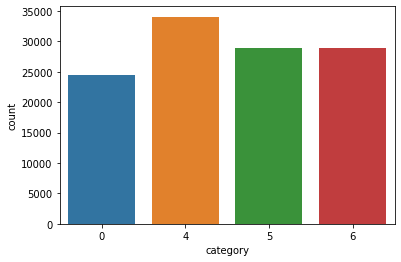

In [ ]:
sns.countplot(result['category'])

In [ ]:
def create_corpus(df):
    corpus = []
    for row in df:
        for word in row:
            if word not in corpus:
                corpus.append(word)
    return corpus

In [ ]:
vocab = create_corpus(result['clean_body'])

In [ ]:
vocab[0:30]

['hi',
 'since',
 'recruiter',
 'lead',
 'permission',
 'approve',
 'requisitions',
 'makes',
 'please',
 'make',
 'thanks',
 'icon',
 'dear',
 'setup',
 'per',
 'engineers',
 'let',
 'details',
 'needed',
 'work',
 'experience',
 'user',
 'student',
 'coming',
 'next',
 'name',
 'much',
 'appreciate',
 'duration',
 'thank']

In [ ]:
from gensim.models import Word2Vec 

model = Word2Vec(vocab, min_count=2)
model.save("word2vec.model")

In [ ]:
model_cbow = Word2Vec(sentences=list(result['']), sg=0, min_count=10, workers=4, window =3)
print(model_cbow)

In [ ]:
# Gensim Libraries
import gensim
from gensim.models import Word2Vec,KeyedVectors

# For visualization of word2vec model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model

In [ ]:
model.wv.most_similar('hi', topn=10)

KeyError: ignored

In [ ]:
df0=df[df['category']==0]
df5=df[df['category']==5]
df6=df[df['category']==6]

In [ ]:
df0=df0[['body']]
df5=df5[['body']]
df6=df6[['body']]

In [ ]:
len(df0)

2226

In [ ]:
def augment_sent(df,n,category):
  l=list(df['body'])
  new_l=[]
  for i in l:
    new_l+=aug.augment(i, n)
  df=pd.concat([df,pd.DataFrame(new_l,columns=['body'])])
  df['category']=category
  return df



In [ ]:
df0=augment_sent(df0,10,0)
df5=augment_sent(df5,2,5)
df6=augment_sent(df6,10,6)

,body,category
24,badge removed dear please badge since he worki...,0
34,re card va se,0
83,card hi guys please que activate card worker p...,0
125,maternity leaver form hello please fill matern...,0
126,update bun reg si update ave interval interval...,0
...,...,...
22255,sent wednesday july re sensitive information a...,0
22256,sent wednesday july re sensitive information a...,0
22257,sent wednesday july re sensible information ac...,0
22258,sent wednesday july re sensitive information a...,0


In [ ]:
res=pd.concat([df0,df5,df6])

In [ ]:
res

,body,category
24,badge removed dear please badge since he worki...,0
34,re card va se,0
83,card hi guys please que activate card worker p...,0
125,maternity leaver form hello please fill matern...,0
126,update bun reg si update ave interval interval...,0
...,...,...
26275,sent thursday july bandwidth problems hello yo...,6
26276,sent thursday july bandwidth problems hello yo...,6
26277,sent thursday july bandwidth problems hello yo...,6
26278,sent thursday july bandwidth problem hello you...,6


In [ ]:
sentences=[]
for i in res['body']:
  sentences.append(nltk.word_tokenize(i))

len(sentences)

82296

In [ ]:
df4=df[df['category']==4]

In [ ]:
res=pd.concat([res,df4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


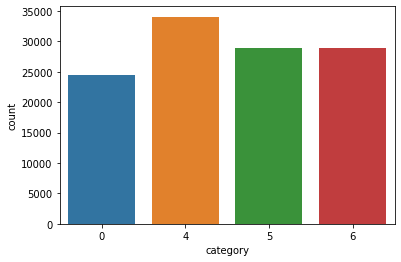

In [ ]:
sns.countplot(res['category'])

In [ ]:
res=res[['body','category']]

In [ ]:
res

,body,category
24,badge removed dear please badge since he worki...,0
34,re card va se,0
83,card hi guys please que activate card worker p...,0
125,maternity leaver form hello please fill matern...,0
126,update bun reg si update ave interval interval...,0
...,...,...
48543,cannot laptop sa sa si intra si ca ti recent i...,4
48544,sent tuesday july re git space for hi got righ...,4
48545,sent july error hi guys can you help out with ...,4
48547,sent tuesday july error hello guys have receiv...,4


In [ ]:
res.to_csv("result.csv")

In [ ]:
model_cbow = Word2Vec(sentences)
print(model_cbow)

Word2Vec(vocab=11210, size=100, alpha=0.025)


In [ ]:
model_cbow.save("word2vec.model")

In [ ]:
model_cbow.wv.vocab.keys()

dict_keys(['badge', 'removed', 'dear', 'please', 'since', 'he', 'working', 'anymore', 'best', 'regards', 're', 'card', 'va', 'se', 'hi', 'guys', 'que', 'activate', 'worker', 'paint', 'wall', 'morning', 'engineer', 'ext', 'maternity', 'leaver', 'form', 'hello', 'fill', 'today', 'her', 'leave', 'update', 'bun', 'reg', 'si', 'ave', 'interval', 'return', 'ca', 'calculator', 'exact', 'cum', 'thank', 'administration', 'officer', 'saturdays', 'change', 'regarding', 'availability', 'cards', 'cleaning', 'ladies', 'namely', 'available', 'until', 'assist', 'thanks', 'floor', 'problem', 'can', 'not', 'enter', 'where', 'cluster', 'kind', 'accounts', 'payable', 'lost', 'la', 'pus', 'backpack', 'care', 'secure', 'area', 'senior', 'wednesday', 'pm', 'outstanding', 'approvals', 'part', 'process', 'needs', 'surrey', 'attention', 'originates', 'technical', 'approvers', 'sn', 'getting', 'these', 'mails', 'advised', 'received', 'advise', 'how', 'proceed', 'analyst', 'sd', 'across', 'member', 'tasks', 'assi

In [ ]:
model.train(vocab,total_examples=1, epochs=1)

(22299, 131732)

In [ ]:
model_cbow.wv.most_similar('hi', topn=10) 

[('hello', 0.9365631341934204),
 ('howdy', 0.8403979539871216),
 ('hullo', 0.8282062411308289),
 ('dear', 0.7594799995422363),
 ('hawaii', 0.7438814043998718),
 ("hawai'i", 0.7295922040939331),
 ('hey', 0.6391687393188477),
 ('do', 0.4773690104484558),
 ('pricy', 0.47615253925323486),
 ('costly', 0.4759839177131653)]

In [ ]:
def make_feature_vec(words, model, num_features=100):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((num_features,),dtype="float32")  # pre-initialize (for speed)
    nwords = 0.
    index2word_set = set(model.index2word)  # words known to the model

    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            feature_vec = np.add(feature_vec,model[word])
    
    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec

def get_avg_feature_vecs(sentences, model, num_features=100):
    """
    Calculate average feature vectors for all reviews
    """
    counter = 0.
    review_feature_vecs = np.zeros((len(reviews),num_features), dtype='float32')  # pre-initialize (for speed)
    
    for sentence in sentences:
        review_feature_vecs[counter] = make_feature_vec(sentence, model, num_features)
        counter = counter + 1.
    return review_feature_vecs

# ML MODELS******

In [ ]:
#importing all the libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
res=pd.read_csv("result.csv")
res=res.sample(frac=1)

In [ ]:
#Converting the sentences tokens (words) and calculating idf for every word (idf assigns weight to each word based on their occurences in documents)
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english',min_df=20,sublinear_tf=True)
tfidf_wm = tfidfvectorizer.fit_transform(list(res['body']))
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = [i for i in range(0,len(res))],columns = tfidf_tokens)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#We will now use each word as a feature to predict our target variable (Category)
df_tfidfvect

,10,105,14,20,24,2d,2nd,34,3rd,50,...,yes,yesterday,yield,yr,zephyr,zero,zip,zona,zone,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y=res['category']

In [ ]:
X_train = df_tfidfvect[:int(len(res)*.8)]
y_train = y[:int(len(res)*.8)]
X_test = df_tfidfvect[int(len(res)*.8):]
y_test = y[int(len(res)*.8):]

Logistic Regression

In [ ]:
# Logistic Regression
C= [0.01,0.1,1]         #Regularixation parameter
for i in C:
  lr_clf=LogisticRegression(C=i)
  #Fitting the model
  lr_clf.fit(X_train,y_train)
  #predicting target variable for train and test data
  y_train_pred=lr_clf.predict(X_train)
  y_valid_pred=lr_clf.predict(X_test)
  #Finding train and test accuracy
  accuracy1=accuracy_score(y_train, y_train_pred)
  accuracy2=accuracy_score(y_test, y_valid_pred)
  print("For hyp=(C={}), Training accuracy of Logistic Regression: {}%\n Test Accuracy of Logistic Regression:{}%\n".format(i,accuracy1*100,accuracy2*100))

ValueError: ignored

In [ ]:
sum(y_test.isna())

1

Random Forests

In [ ]:
# Random Forests 
n=[100,200,300,400]             # no. of estimators (trees)
criterion=["gini", "entropy"]   #Information criterion
for i in criterion:
  for j in n:
    rf_clf = RandomForestClassifier(n_estimators=j, criterion=i)
    #Fitting the model
    rf_clf.fit(X_train, y_train)
    #predicting target variable for train and test data
    y_train_pred = rf_clf.predict(X_train)
    y_test_pred = rf_clf.predict(X_test)
    #Finding train and test accuracy
    accuracy1=accuracy_score(y_train, y_train_pred)
    accuracy2=accuracy_score(y_test, y_test_pred)
    print("For hyp(n={}, C={}) - Training accuracy of Random Forests: {}%\n Test Accuracy of Random Forests :{}%\n".format(j, i, accuracy1*100,accuracy2*100))

SVM

In [ ]:
#SVC
from sklearn import svm
kernels = ['linear', 'rbf', 'poly'] #type of kernel
cs = [0.01,0.1]                     # Regularization parameter
gammas = [0.1, 0.01]                # Kernel Coefficient
for gamma in gammas:
  for c in cs:
    for kernel in kernels:
      #Fitting the model
      svc = svm.SVC(kernel=kernel, gamma=gamma, C=c).fit(X_train, y_train)
      #predicting target variable for train and test data
      y_train_pred=svc.predict(X_train)
      y_valid_pred=svc.predict(X_test)
      #Finding train and test accuracy
      accuracy1=accuracy_score(y_train, y_train_pred)
      accuracy2=accuracy_score(y_test, y_valid_pred)
      print("Training accuracy of SVC(K={}, G={}, C={}): {}%\n Test Accuracy of SVC(K={}, G={}, C={}): {}%\n".format(kernel, gamma, c, accuracy1*100, kernel,c, gamma,accuracy2*100))

XG Boost

In [ ]:
# Normalizing the data for XGB CLassifier

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
# XG boost
xgb_clf = XGBClassifier(use_label_encoder=False)
#Fitting the model
xgb_clf.fit(X_train, y_train)
#predicting target variable for train and test data
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)
#Finding train and test accuracy
accuracy1=accuracy_score(y_train, y_train_pred)
accuracy2=accuracy_score(y_test, y_test_pred)
print("Training accuracy of XGB: {}%\n Test Accuracy of XGB:{}%".format(accuracy1*100,accuracy2*100))